In [ ]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'], 
 columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

In [ ]:
#sobthere are no null values need not drop columns or modify

In [ ]:
 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
feature_cols = df.columns
feature_cols = feature_cols.drop('y')

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: y, Length: 569, dtype: int64

In [ ]:
feature_cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# split data as 70% training and 30% test

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,0.2562,1.0380,1.686,18.62,0.006662,0.012280,0.021050,0.010060,0.01677,0.002784,12.65,21.19,80.88,491.8,0.13890,0.15820,0.180400,0.09608,0.2664,0.07809
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.251200,0.13390,0.2534,0.07858
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,0.2513,0.5040,1.714,18.54,0.007327,0.011530,0.017980,0.007986,0.01962,0.002234,13.45,15.77,86.92,549.9,0.15210,0.16320,0.162200,0.07393,0.2781,0.08052
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,0.2456,0.7339,1.667,15.89,0.005884,0.020050,0.026310,0.013040,0.01848,0.001982,12.64,19.67,81.93,475.7,0.14150,0.21700,0.230200,0.11050,0.2787,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,0.4953,1.1990,2.765,63.33,0.005033,0.031790,0.047550,0.010430,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.567300,0.17320,0.3305,0.08465
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.10760,0.12230,0.097550,0.03413,0.2300,0.06769
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.056160,0.042520,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.15850,0.73940,0.656600,0.18990,0.3313,0.13390
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,0.2589,1.5030,1.667,22.07,0.007389,0.013830,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.12870,0.15130,0.062310,0.07963,0.2226,0.07617


In [ ]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.06300,0.2086,0.07406,0.5462,1.5110,4.795,49.45,0.009976,0.052440,0.052780,0.015800,0.02653,0.005444,16.46,18.34,114.10,809.2,0.1312,0.36350,0.32190,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.07340,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.023360,0.029050,0.012150,0.01743,0.003643,15.67,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.061550,0.03370,0.1730,0.06470,0.2094,0.7636,1.231,17.67,0.008725,0.020030,0.023350,0.011320,0.02625,0.004726,13.74,19.93,88.81,585.4,0.1483,0.20680,0.22410,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.014120,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.02739,0.1852,0.05294,0.4681,1.6270,3.043,45.38,0.006831,0.014270,0.024890,0.009087,0.03151,0.001750,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
487,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.225600,0.11940,0.1823,0.06115,0.5659,1.4080,3.631,67.74,0.005288,0.028330,0.042560,0.011760,0.01717,0.003211,23.96,30.39,153.90,1740.0,0.1514,0.37250,0.59360,0.20600,0.3266,0.09009
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.027910,0.012820,0.02008,0.004144,20.42,27.28,136.50,1299.0,0.1396,0.56090,0.39650,0.18100,0.3792,0.10480
268,12.87,16.21,82.38,512.2,0.09425,0.06219,0.039000,0.01615,0.2010,0.05769,0.2345,1.2190,1.546,18.24,0.005518,0.021780,0.025890,0.006330,0.02593,0.002157,13.90,23.64,89.27,597.5,0.1256,0.18080,0.19920,0.05780,0.3604,0.07062


In [ ]:
y_train

249    1
58     1
476    1
529    1
422    1
      ..
129    0
144    1
72     0
235    1
37     1
Name: y, Length: 398, dtype: int64

In [ ]:
#decision tree start

In [ ]:
 
classifier = DecisionTreeClassifier()
 
classifier = classifier.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
print("Accuracy of y prediction on test data:",metrics.accuracy_score(y_test, y_pred))

Accuracy of y prediction on test data: 0.9415204678362573


In [ ]:
 
y_train_predict = classifier.predict(X_train)
 
print("Accuracy of y prediction on train data:",metrics.accuracy_score(y_train, y_train_predict))

Accuracy of y prediction on train data: 1.0


In [ ]:
#decision tree

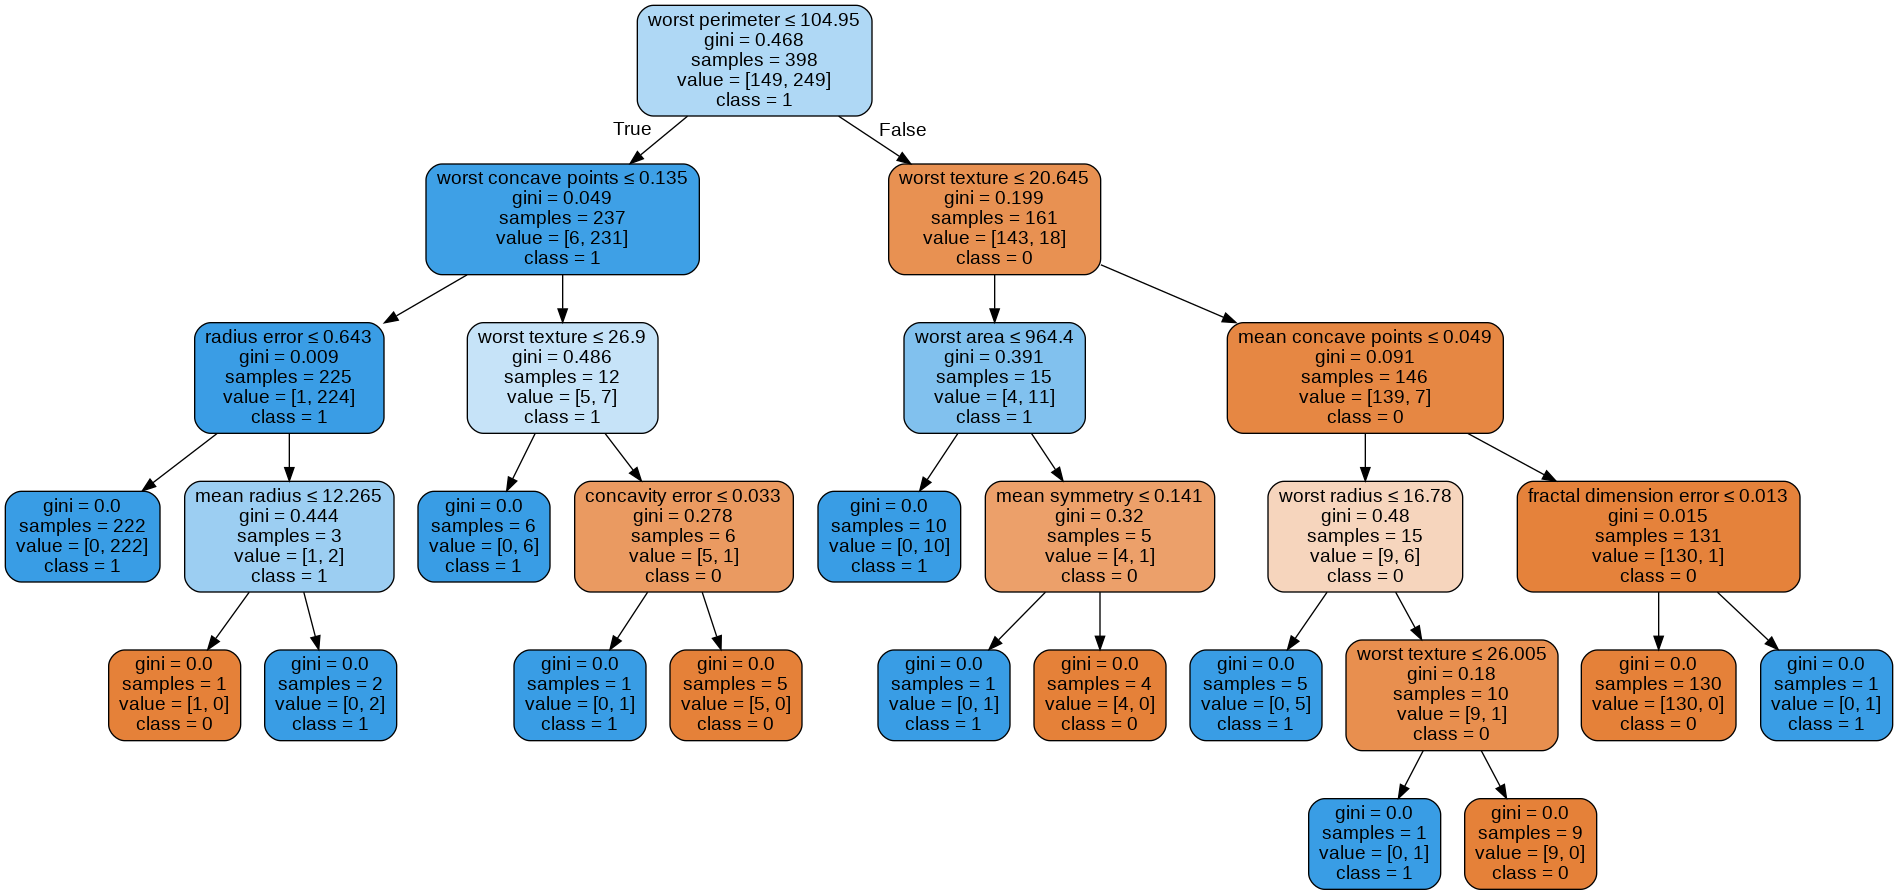

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus
 
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Breast_cancer_decision_tree.png')
Image(graph.create_png())

In [105]:
dt_tuned=  DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=10)

In [106]:
dt_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
dt_tuned= dt_tuned.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred_new= dt_tuned.predict(X_test)

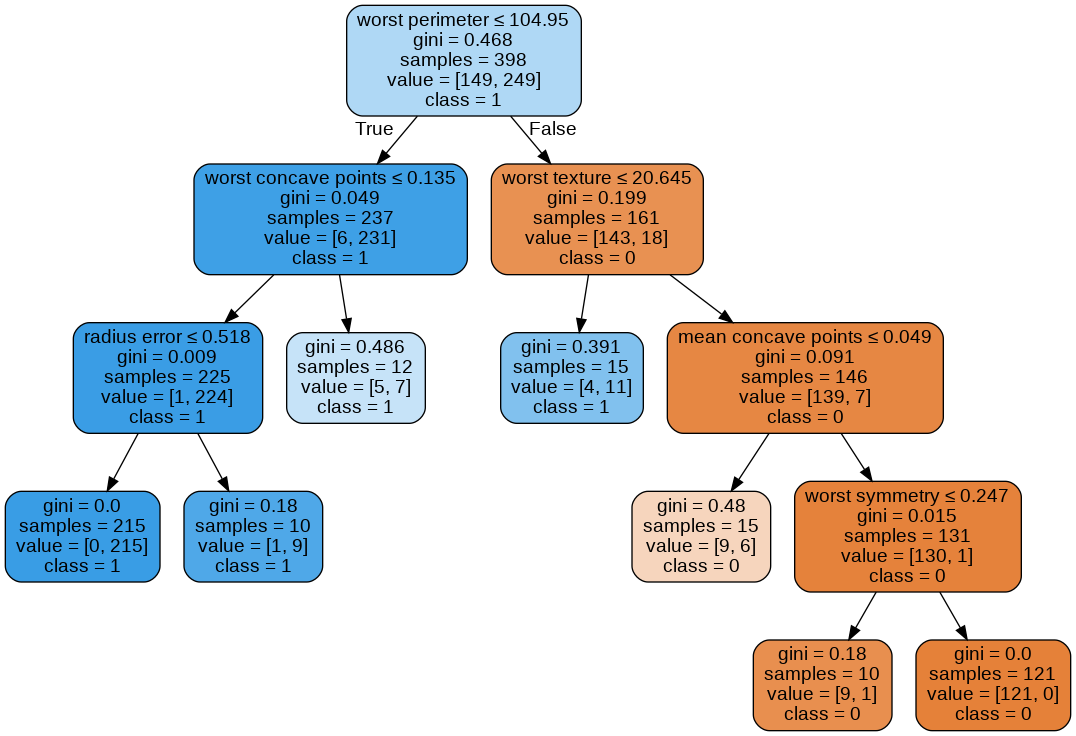

In [108]:
dot_data = StringIO()
export_graphviz(dt_tuned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cancer.png')
Image(graph.create_png())

In [109]:
#decision tree end
#but decision tree classifier is not taking list as parameters

In [ ]:
#random forest start

In [ ]:
estimator = RandomForestClassifier(random_state=0, warm_start = True)
estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=True)

In [ ]:
y_pred_test_rf= estimator.predict(X_test)
print("recall_score :",recall_score(y_test, y_pred_test_rf))     
print("precision_score :",precision_score(y_test, y_pred_test_rf))  
print("roc_auc_score :",roc_auc_score(y_test, y_pred_test_rf))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred_test_rf)))

recall_score : 0.9629629629629629
precision_score : 0.9454545454545454
roc_auc_score : 0.9338624338624338

 confusion matrix on validation data: 
[[ 57   6]
 [  4 104]]


In [ ]:
rf_tuned_parameters =  {"criterion": ["gini", "entropy"], "max_depth": [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}

In [ ]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) 
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.988, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.985, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.994, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.990, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.987, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.985, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.994, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.987, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=50, score=0.983, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=50, score=0.979, 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   20.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [ ]:
 
pred_test = cv_grid.predict(X_test)
print("recall_score :",recall_score(y_test, pred_test))     
print("precision score :",precision_score(y_test, pred_test))  
print("roc_auc_score :",roc_auc_score(y_test, pred_test))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

recall_score : 0.9444444444444444
precision score : 0.9357798165137615
roc_auc_score : 0.9166666666666666

 confusion matrix on validation data: 
[[ 56   7]
 [  6 102]]


In [ ]:
#gradient booster method start

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred_gb= gradient_booster.predict(X_test)

In [ ]:
y_pred_gb

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred_gb)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred_gb)))
print ('Classification Report : \n', classification_report(y_test, y_pred_gb))
print('AUC-ROC:',roc_auc_score(y_test, y_pred_gb))
print('LOGLOSS Value is ' , log_loss(y_test, y_pred_gb))

Confusion Matrix : 
 [[ 58   5]
 [  1 107]]
Accuracy Score is 0.9649
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

AUC-ROC: 0.9556878306878308
LOGLOSS Value is  1.2119102710913172


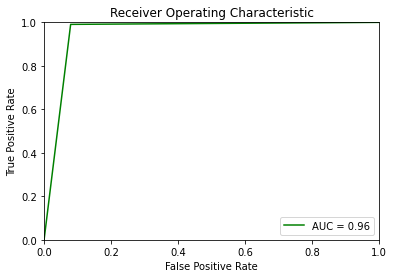

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#knn classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
y_pred_knn

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred_knn)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred_knn)))
print ('Classification Report : \n', classification_report(y_test, y_pred_knn))
print('AUC-ROC:',roc_auc_score(y_test, y_pred_knn))
print('LOGLOSS Value is ' , log_loss(y_test, y_pred_knn))

Confusion Matrix : 
 [[ 57   6]
 [  5 103]]
Accuracy Score is 0.9357
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

AUC-ROC: 0.9292328042328043
LOGLOSS Value is  2.2218206896409285


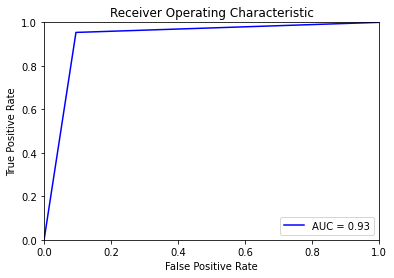

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()